# Boston House Prices

The following notebook will attempt to address the following:

This assessment concerns the well-known Boston House Prices [1] dataset and the
Python [3] packages scipy [2], keras [7], and jupyter [6]. 

There are three parts which will be addressed:
***
Describe: Create a git repository and make it available online for the lecturer
to clone. The repository should contain all your work for this assessment. Within
the repository, create a jupyter [6] notebook that uses descriptive statistics and
plots to describe the Boston House Prices [1] dataset. This part is worth 20% of
your overall mark.

***
Infer: To the above jupyter notebook, add a section where you use inferential
statistics to analyse whether there is a significant difference in median house prices
between houses that are along the Charles river and those that aren’t. You should
explain and discuss your findings within the notebook. This part is also worth
20%.
***
Predict: Again using the same notebook, use keras [7] to create a neural network
that can predict the median house price based on the other variables in the dataset.
You are free to interpret this as you wish — for example, you may use all the other
variables, or select a subset. This part is worth 60%.


The minimum standard for this assessment is a git repository containing a README file
written in Markdown [5] and a jupyter notebook containing your work. The README
should contain a summary of your work and provide instructions as to how to run the
jupyter notebook and the web application. A better project will be well laid out, clear
and concise, and easily understood and run.

Note I will rewite the above. I will leave this in the first cell as a guide to myself while completing the project.

### 1. Description of the dataset

The Boston House prices dataset is drawn from the Boston Standard Metropolitan Statisical Area in 1970. Each record describes a Boston suburb or town. There are several attributes included for each of these records. There are 506 records and each of these has 13 variables, which may have an influence on the pricing of the houses in question. The aim is to predict the house prices using the 13 variables.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# Pretty display for notebooks
%matplotlib inline

#Importing the dataset
from sklearn.datasets import load_boston

boston = load_boston()

#print out the variables within the dataset with their keys and explanations
print(boston.keys())
dict_keys = boston.keys
dict_keys()
#this will print out the variables and an explanation of them
print(boston.DESCR) 
pd.DataFrame

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,0

pandas.core.frame.DataFrame

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   24.0   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   21.6   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   34.7   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   33.4   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   36.2   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


C:\Users\luisa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


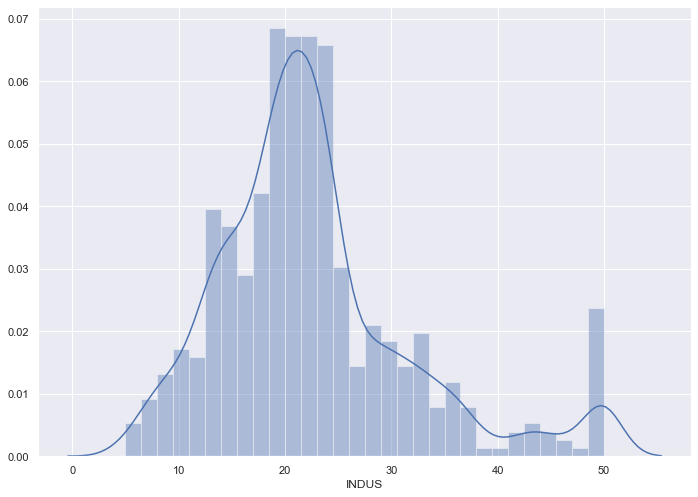

KeyError: 'STAT'

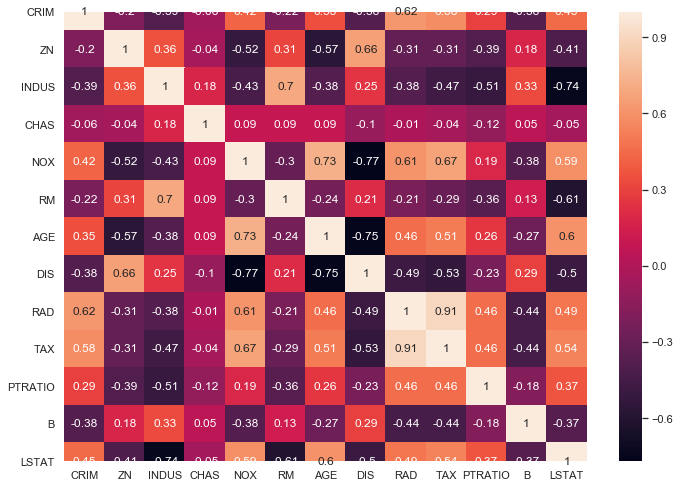

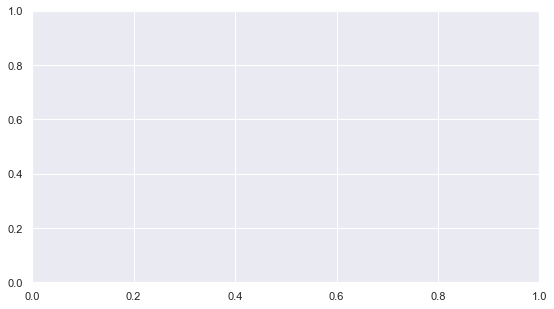

In [32]:
#add the attribute keys as column headings with the data itself TO DO
boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# print(boston) to check whether the colums were added correctly
print(boston.columns)
# this sets the size of the figure
bopd = pd.DataFrame(boston.data)
bopd.columns = boston.feature_names
# why is MEDV missing???
print(bopd.head())
boston.target[:2]
boston.target2[:0]
bopd['INDUS'] = boston.target
bopd2['CRIM'] = boston.target2
sns.set(rc = {'figure.figsize':(11.7,8.27)})
# this creates a plot of the dataset, based on the MEDV variable, separated into 30 bins to better display the data
sns.distplot(bopd['INDUS'], bins = 30)
plt.show()
# create a correlation matrix between the variables
correlation_matrix = bopd.corr().round(2)

# create a heatmap of the correlation data, a value close to -1 stands for a negative correlation, a value close to 1 means a positive correlation
sns.heatmap(data = correlation_matrix, annot = True)
plt.figure(figsize = (20, 5))
features = ['LSTAT', 'RM']
target = bopd['INDUS']

for i, col in enumerate (features):
    plt.subplot (l, len(features), i + 1)
    x = boston.target2
    y = boston.target
    plt.scatter(x, y, marker = 'o')
    plt.title(col)
    plt.xlabel('CRIM')
    plt.ylabel('INDUS')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = bopd[x]
y = bopd[y]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

#training and testing the model
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

#evaluating the training set
y_train_predict = lin_model.predict(X_train)
rmse = (up.sqrt(mean_squared.error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The performance of the model for the training set is")
print("**************************************")
print('The RMSE is {}'.format(rmse))
print('The R2 score is{}'.format(r2))
print("\n")

#evaluating the test set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, _test_predict)
print("The performance of the model for the testing set is")
print("**************************************")
print('The RMSE is {}'.format(rmse))
print('The R2 score is {}'.format(r2))

# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

NameError: name 'x' is not defined

### 2. Inferential statistics for the Charles River House Prices

Still need to get the Charles River house prices data separated (CHAS >> dummy variable for the Charles River 1 for yes)

In [ ]:
boston.target3[:3]
charlesRiver['CHAS'] = boston.target3
# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

discuss the findings briefly

### 3. Predict: Creating a neural network

In [ ]:
tensorflow.python.keras.datasets.boston_housing.load_data
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# take a look at the data

print(f'Training data : {train_data.shape}')
print(f'Test data : {test_data.shape}')
print(f'Training sample : {train_data[0]}')
print(f'Training target sample : {train_targets[0]}')

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [ ]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
    return model

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f'Processing fold # {i}')
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
                            [train_data[:i * num_val_samples],
                            train_data[(i+1) * num_val_samples:]],
                            axis=0)
    partial_train_targets = np.concatenate(
                            [train_targets[:i * num_val_samples],
                            train_targets[(i+1)*num_val_samples:]],
                            axis=0)
    model = build_model()
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              batch_size=1,
              verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
print(f'all_scores : {all_scores}')
print(f'mean all scores : {np.mean(all_scores)}')

In [ ]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

discuss the findings briefly

## References:

https://www.ritchieng.com/machine-learning-project-boston-home-prices/
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d
https://www.kaggle.com/shanekonaung/boston-housing-price-dataset-with-keras
https://www.kaggle.com/callmejeffery/boston-house-price-with-keras
https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

## End